In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('superstore_data.csv', parse_dates = ["Dt_Customer"])
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,11,0,34,2,3,1,2,7,1,0


About this file:

This data was gathered during last year's campaign. Data description is as follows;

-Response (target) - 1 if customer accepted the offer in the last -campaign, 0 otherwise

-ID - Unique ID of each customer

-Year_Birth - Age of the customer

-Complain - 1 if the customer complained in the last 2 years

-Dt_Customer - date of customer's enrollment with the company

-Education - customer's level of education

-Marital - customer's marital status

-Kidhome - number of small children in customer's household

-Teenhome - number of teenagers in customer's household

-Income - customer's yearly household income

-MntFishProducts - the amount spent on fish products in the last 2 years

-MntMeatProducts - the amount spent on meat products in the last 2 years

-MntFruits - the amount spent on fruits products in the last 2 years

-MntSweetProducts - amount spent on sweet products in the last 2 years

-MntWines - the amount spent on wine products in the last 2 years

-MntGoldProds - the amount spent on gold products in the last 2 years

-NumDealsPurchases - number of purchases made with discount

-NumCatalogPurchases - number of purchases made using catalog (buying -goods to be shipped through the mail)
-NumStorePurchases - number of purchases made directly in stores

-NumWebPurchases - number of purchases made through the company's website

-NumWebVisitsMonth - number of visits to company's website in the last month

-Recency - number of days since the last purchase*

In [3]:
df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

In [4]:
# Below are the columns we will have to convert to numeric data types
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Education
Marital_Status
Dt_Customer


In [5]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [6]:
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [7]:
# Drop ID column

df.drop('Id', axis = 1, inplace = True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,...,11,0,34,2,3,1,2,7,1,0


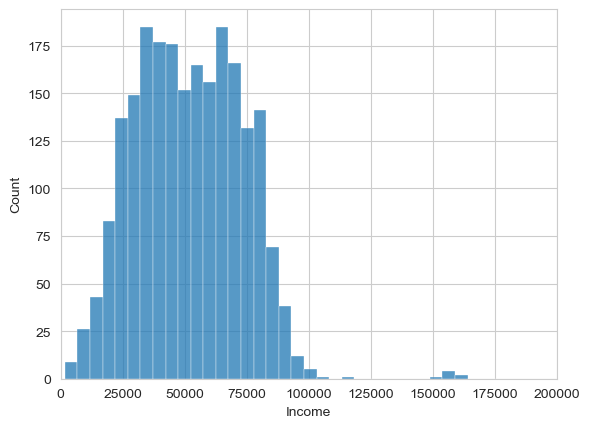

In [8]:
sns.set_style("whitegrid")
income_hist = sns.histplot(df.Income)
income_hist.set_xlim(0,200000);

In [9]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

/Users/louiepillari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumStorePurchases', ylabel='count'>

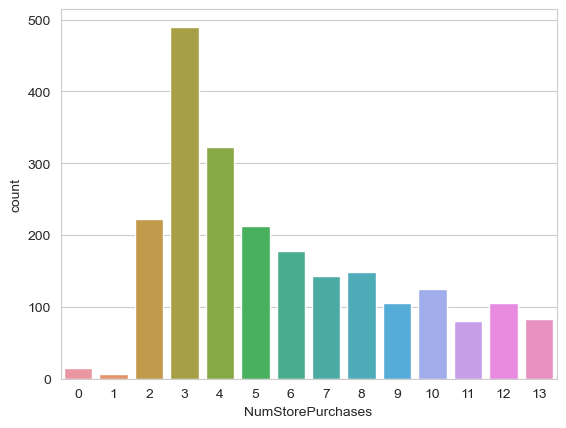

In [10]:
sns.countplot(df.NumStorePurchases)

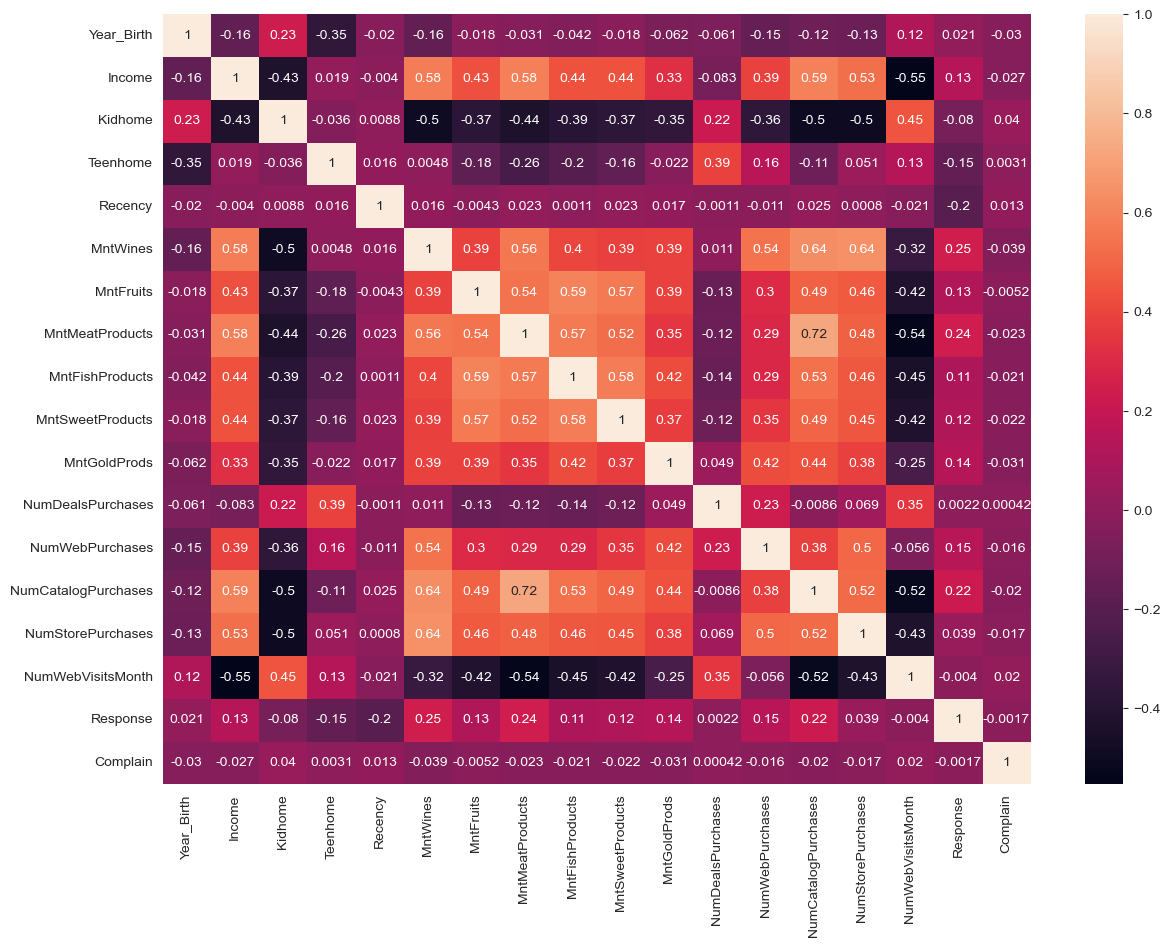

In [11]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

## We see from above correlation matrix that number of store purchases has the most correlation with
- Number of Catalog Purchases
- Number of Web Purchases
- Amount of Wines
- Income

In [12]:
num = df.select_dtypes(np.number)
cat = df.select_dtypes(object)

In [13]:
yr = 2023
df['Age'] = yr-df['Year_Birth']
df['Age']

0       53
1       62
2       65
3       56
4       34
        ..
2235    47
2236    46
2237    47
2238    45
2239    54
Name: Age, Length: 2240, dtype: int64

In [14]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,189,218,1,4,4,6,1,1,0,53
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,37,1,7,3,7,5,1,0,62
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,2,30,1,3,2,5,2,0,0,65
3,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,...,0,0,1,1,0,2,7,0,0,56
4,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,...,0,34,2,3,1,2,7,1,0,34


<AxesSubplot:xlabel='Age', ylabel='Teenhome'>

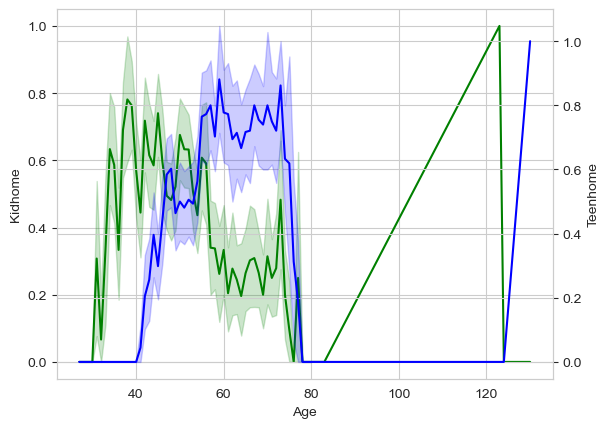

In [15]:
sns.lineplot(x = df.Age, y = df.Kidhome, color = 'g')
ax2 = plt.twinx()
sns.lineplot(x = df.Age, y = df.Teenhome, color = 'b', ax = ax2)

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='NumWebPurchases'>

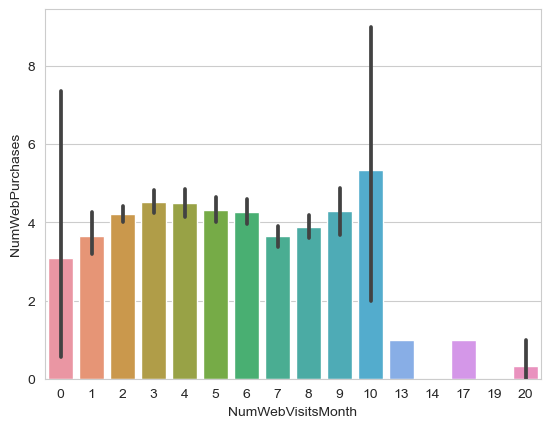

In [16]:
sns.barplot(x = df.NumWebVisitsMonth, y = df.NumWebPurchases)

In [17]:
# Time to turn our strings into numbers
cat

,Education,Marital_Status
0,Graduation,Divorced
1,Graduation,Single
2,Graduation,Married
3,Graduation,Together
4,Graduation,Single
...,...,...
2235,PhD,Divorced
2236,2n Cycle,Married
2237,Graduation,Divorced
2238,Graduation,Married


In [18]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [19]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

In [21]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1970,2,2,84835.0,0,0,2014-06-16,0,189,104,...,189,218,1,4,4,6,1,1,0,53
1,1961,2,4,57091.0,0,0,2014-06-15,0,464,5,...,0,37,1,7,3,7,5,1,0,62
2,1958,2,3,67267.0,0,1,2014-05-13,0,134,11,...,2,30,1,3,2,5,2,0,0,65
3,1967,2,5,32474.0,1,1,2014-11-05,0,10,0,...,0,0,1,1,0,2,7,0,0,56
4,1989,2,4,21474.0,1,0,2014-08-04,0,6,16,...,0,34,2,3,1,2,7,1,0,34


In [22]:
# Since our classifier does not accept a datetime column, let's extract some 
# numeric data from that column 

df["Dt_Year"] = df.Dt_Customer.dt.year
df["Dt_Month"] = df.Dt_Customer.dt.month
df["Dt_Day"]= df.Dt_Customer.dt.day
df["Dt_DayOfWeek"] = df.Dt_Customer.dt.dayofweek
df["Dt_DayOfYear"] = df.Dt_Customer.dt.dayofyear

In [23]:
# Since we have extracted the data we want, we can now drop Dt_Customer column

df.drop('Dt_Customer', axis =1, inplace = True)

### Now that all data is numeric we can instantiate our model

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier()

### Split out data into trian and test sets

In [52]:
X = df.drop('Response', axis = 1)
y = df['Response']

In [53]:
X.shape, y.shape

((2240, 25), (2240,))

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 42, 
                                                    test_size=.20)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1792, 25), (448, 25), (1792,), (448,))

In [57]:
X_train.Income.fillna(X_train.Income.median(), inplace = True)

In [58]:
X_test.fillna(X_test.Income.median(), inplace = True)

In [60]:
df.dtypes

Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
Age                      int64
Dt_Year                  int64
Dt_Month                 int64
Dt_Day                   int64
Dt_DayOfWeek             int64
Dt_DayOfYear             int64
dtype: object

In [61]:
# Should be good to fit our model now !

model = RandomForestClassifier(random_state = 42)

In [62]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred = model.predict(X_test)

In [65]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[364,  12],
       [ 51,  21]])

In [66]:
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.4
0.859375


In [67]:
# Let's now use KNN to do classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [68]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [69]:
import math
math.sqrt(len(y_test))

21.166010488516726

In [70]:
knn = KNeighborsClassifier(n_neighbors = 21, metric = 'euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [71]:
y_preds = knn.predict(X_test)
y_preds

/Users/louiepillari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[374,   2],
       [ 69,   3]])

In [73]:
print(f1_score(y_test, y_preds))

0.07792207792207792


In [74]:
print(accuracy_score(y_test, y_preds))

0.8415178571428571


In [ ]:
# To take this project further I would preform some feature selection and hyperparameter tuning such as RandomizedSearch